# Проект: Исследование стартапов

## Цели и задачи проекта

**Цель:** 

Провести исследовательский анализ рынка для дальнейшего входа на инвестиционный рынок с целью покупки, развития и последующей перепродажей перспектиынх стартапов.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым
2. Провести предобработку данных
3. Провести исследовательский анализ данных:
- оценить, можно ли доверять данным о сотрудниках стартапов и их образовании
- выявить, что означают покупки за 0 или 1 доллар
- узнать какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой
- рассчитать и отобразить численные показатели и динамику
- выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании
4. Сформулировать итоговые выводы и рекомендации по проведенному анализу

## Структура проекта

1. Загрузка данных и работа с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Детальное исследование заведений типа «пиццерия»
5. Итоговые выводы


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

**Для анализа поступили данные:**

- `acquisition.csv` - информация о покупках одними компаниями других компаний
- `company_and_rounds.csv` - информация о компаниях и раундах финансирования
- `degrees.csv` - информация о типе образования сотрудника
- `education.csv` - информация об образовании сотрудника
- `fund.csv` - информация о фондах
- `investment.csv` - информация о раундах инвестирования
- `people.csv` - информация о сотрудниках


## Описание данных

### Описание таблицы `acquisition`
- `id` — идентификатор покупки
- `acquiring_company_id` — идентификатор покупающей компании
- `acquired_company_id` — идентификатор покупаемой компании
- `term_code` — варианты расчёта
- `price_amount` — сумма сделки
- `acquired_at` — дата сделки

### Описание таблицы `company_and_rounds`
- `company ID` — идентификатор компании
- `name` — название компании
- `category code` — категория области деятельности компании
- `status` — статус компании
- `founded at` — дата инвестирования
- `closed at` — дата закрытия компании
- `domain` — официальный сайт компании
- `network username` — ник компании в сети
- `country code` — код страны компании
- `investment rounds` — число инвестиционных раундов
- `funding rounds` — число раундов финансирования
- `funding total` — сумма финансирования
- `milestones` — вехи финансирования
- `funding round id` — идентификатор этапа финансирования
- `company id` — идентификатор компании
- `funded at` — дата финансирования
- `funding round type` — тип финансирования
- `raised amount` — сумма финансирования
- `pre money valuation` — предварительная денежная оценка
- `participants` — число участников
- `is first round` — является ли раунд первым
- `is last round` — является раунд последним
- `milestones` — вехи финансирования

### Описание таблицы `fund`
- `id` — идентификатор фонда
- `name` — название фонда
- `category_code` — категория области деятельности компании
- `founded_at` — дата создания фонда
- `domain` — сайт фонда
- `network_username` — ник фонда в сети
- `country_code` — код страны фонда
- `investment_rounds` — число инвестиционных раундов
- `invested_companies` — число профинансированных компаний
- `milestones` — вехи финансирования

### Описание таблицы` investment`
- `id` — идентификатор этапа инвестирования
- `funding_round_id` — идентификатор раунда инвестирования
- `company_id` — индентификатор компании
- `funding_round_type` — тип финансирования
- `fund_id` — идентификатор фонда

### Описание таблицы `education`
- `id` — идентификатор записи об образовании
- `person_id` — идентификатор работника
- `instituition` — название учебного заведения
- `graduated_at` — дата получения образования

### Описание таблицы `people`
- `id` — идентификатор сотрудника
- `first_name` — имя сотрудника
- `last_name` — фамилия сотрудника
- `company_id` — идентификатор компании
- `network_username` — ник в социальных сетях
- `graduated_at` — дата получения образования

### Описание таблицы `degrees`
- `id` — идентификатор записи
- `object_id` — идентификатор сотрудника
- `degree_type` — тип образования
- `subject` — специальность

### 1.1. Вывод общей информации, исправление названия столбцов

Загрузим библиотеки и таблицы. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в переменных.

* Загрузите все данные по проекту.

* Проверьте названия столбцов и есть ли в датасетах полные дубликаты строк.

* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Создаем отдельную переменную для повторяющейся части датасетов
base_url = 'https://code.s3.yandex.net/datasets/'

# Выгружаем данные в переменные
acquisition = pd.read_csv(base_url + 'acquisition.csv')
company_and_rounds = pd.read_csv(base_url + 'company_and_rounds.csv')
fund = pd.read_csv(base_url + 'fund.csv')
investment = pd.read_csv(base_url + 'investment.csv')
education = pd.read_csv(base_url + 'education.csv')
people = pd.read_csv(base_url + 'people.csv')
degrees = pd.read_csv(base_url + 'degrees.csv')

Познакомимся с данными датасетов — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату, дополнительная корректировка не требуется
- Все данные представлены типами `object`, `int`
- Данные в столбцах `acquiring_company_id`,  `acquired_company_id` и `id` - Эти колонки сейчас имеют тип `int64`, но значения небольшие, их можно заменить на менее объёмный тип
- `tepm_code` - содержит строки (тип object), можно заменить на `category`, что существенно сэкономит память
- `acquired_at` хранит даты в формате строк (object), для удобства анализа и расчётов рекомендуется преобразовать её в тип `datetime`
- Проспуски содержатся в столбцах `term_code` и `acquired_at`

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию

In [5]:
company_and_rounds.sample(3).T

,197698,50343,90488
company ID,68026.0,186408.0,228029.0
name,TheCarePost.com,Idea Transplant,VHRA.info: The Vacation Home Rental's Aid
category code,NaN,consulting,consulting
status,operating,operating,operating
founded at,NaN,2003-09-01,2011-01-01
closed at,NaN,NaN,NaN
domain,NaN,ideatransplant.com,vhra.info
network username,NaN,ideatransplant,VHRA_info
country code,NaN,ISR,CAN
investment rounds,0.0,0.0,0.0


In [6]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов необходимо привести к единому формату (тип snake_case и нижний регистр)
- Все данные представлены типами `object`, `float`
- Колонки с типом `float64` можно оптимизировать, привести в `int`, т.к. наличие дробной доли в данном случае не несет информации
- Столбцы с датами (`founded at`, `closed at`, `funded at`) сейчас имеют тип `object`. Для работы с датами их лучше преобразовать в формат `datetime`
- Столбцы с типом `object` могут занимать много памяти, если они содержат повторяющиеся значения, можно заменить их на категориальные `category`.
- Во всех столбцах присутствуют пропуски, достаточно большое количество

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию

In [7]:
fund.head(15)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1
5,10000,3x5 Special Opportunity Partners,NaN,NaN,NaN,NaN,4,4,0
6,10001,Salem Partners,1997-01-01,salempartners.com,NaN,USA,1,1,0
7,10002,3T Capital,NaN,3tcapital.com,NaN,FRA,3,3,0
8,10003,Merieux Developpement,2009-01-01,merieux-developpement.com,NaN,FRA,2,2,0
9,10004,Aquasourca,NaN,aquasourca.com,NaN,FRA,1,1,0


In [8]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет `fund.csv` содержит 9 столбцов и 11652 строк, в которых представлена информация о фондах

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату
- Все данные представлены типами `object`, `int`
- В столбцах с целыми числами `int64` можно сделать изменение с целью оптимизации
- Колонка с датами `founded_at` сейчас имеет тип `object`, преобразуем её в формат `datetime`
- Пропуски присутствуют в столбцах `name`, `founded_at`, `domain`, `network_username`, `country_code`

In [9]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [10]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет `investment.csv` содержит 4 столбца и 61403 строк, в которых представлена  информация о раундах инвестирования

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату
- В таблице все данные представлены в числовом формате `int64`. Чтобы сократить использование памяти, можно провести преобразование типа данных для всех колонок, заменив их на `int32`.
- Пропусков в данной таблице нет

In [11]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [12]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату
- В таблице все данные представлены в типах `int` и `object`
- В столбцах с целыми числами `int64` можно сделать изменение с целью оптимизации
- Колонка с датами `graduated_at` сейчас имеет тип `object`, преобразуем её в формат `datetime`
- Пропуски присутствуют в столбцах с названием учебного заведения и датой получения образования

In [13]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [14]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату
- В таблице все данные представлены в типах `int`, `object` и `float`
- В столбцах `id` и `company_id` рекомендуется сделать оптимизвцию на тип `int32`
- Пропуски присутствуют, в столбцах `company_id ` и `network_username` их особенно большое количество

In [15]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату
- В таблице данные представлены в типах `int`, `object`
- В столбце `id` рекомендуется изменить тип данных с целью понижения разрядности
- Столбец `object_id` - значения имеют формат p:XXXX, что указывает на строковый тип, рекомендуется реобразование к типу `category`, так как идентификаторы часто имеют повторяющиеся значения.
- Столбец `degree_type` содержит типы образования, например, MBA, BA, MS, это ограниченный набор категорий, который можно преобразовать в `category`.
- Пропуски присутствуют в столбцах с типом образования и специальностью

### 1.2. Исправление названия столбцов, смена типов данных, анализ дубликатов и пропусков


* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [17]:
# Посмотрим размеры наших таблиц до обработки
print("Размер acquisition до обработки:", len(acquisition))
print("Размер company_and_rounds до обработки:", len(company_and_rounds))
print("Размер fund до обработки:", len(fund))
print("Размер investment до обработки:", len(investment))
print("Размер education до обработки:", len(education))
print("Размер people до обработки:", len(people))
print("Размер degrees до обработки:", len(degrees))

Размер acquisition до обработки: 9407
Размер company_and_rounds до обработки: 217774
Размер fund до обработки: 11652
Размер investment до обработки: 61403
Размер education до обработки: 109610
Размер people до обработки: 226709
Размер degrees до обработки: 109610


In [18]:
# В таблице company_and_rounds переименуем столбец company ID, т.к. он у нас дублируется дважды
company_and_rounds.rename(columns={'company  ID': 'company_id_2'}, inplace=True)

# Объединим 2 столбца company_id в таблице company_and_rounds
company_and_rounds['company_id_combined'] = company_and_rounds['company  id'].combine_first(company_and_rounds['company_id_2'])

# Удалим исходные столбцы после объединения
company_and_rounds.drop(columns=['company  id', 'company_id_2'], inplace=True)

In [19]:
# В таблице company_and_rounds приводим все названия столбцов к единому формату
company_and_rounds.columns = (company_and_rounds.columns.str.strip()
                              .str.lower()
                              .str.replace(r"\s+", "_", regex=True))
print(company_and_rounds.columns)

Index(['name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain',
       'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones', 'funding_round_id',
       'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round', 'company_id_combined'],
      dtype='object')


In [20]:
company_and_rounds.head()

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id_combined
0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,1.0
1,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,1.0
2,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,1.0
3,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [21]:
# Сделаем в таблицах преобразование данных в столбцах в тип datetime
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], errors='coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors='coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')
fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors='coerce')
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')
print("Типы данных для таблицы acquisition:")
print(acquisition.dtypes)
print("\nТипы данных для таблицы company_and_rounds:")
print(company_and_rounds.dtypes)
print("\nТипы данных для таблицы fund:")
print(fund.dtypes)
print("\nТипы данных для таблицы education:")
print(education.dtypes)

Типы данных для таблицы acquisition:
id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

Типы данных для таблицы company_and_rounds:
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants            

In [22]:
# Проверяем полные дубликаты в наших данных
print(acquisition.duplicated().sum())
print(company_and_rounds.duplicated().sum())
print(fund.duplicated().sum())
print(investment.duplicated().sum())
print(education.duplicated().sum())
print(people.duplicated().sum())
print(degrees.duplicated().sum())

0
0
0
0
0
0
0


In [23]:
# Проверим неявные дубликаты
print(acquisition.duplicated(subset='id').sum())
print(company_and_rounds.duplicated(subset='company_id_combined').sum())
print(fund.duplicated(subset='id').sum())
print(investment.duplicated(subset='id').sum())
print(education.duplicated(subset='id').sum())
print(people.duplicated(subset='id').sum())
print(degrees.duplicated(subset='id').sum())

0
20989
0
0
0
1
0


**Проверка на дубликаты показала, что:**
- все наши таблицы не содержат полных дубликатов
- в таблице company_and_rounds присутствует 20989 неявных дубликата, разберем их ниже
- в таблице people у нас один неявный дубликат дубликат

In [24]:
duplicates = company_and_rounds[company_and_rounds.duplicated(subset='company_id_combined', keep=False)]
display(duplicates)

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id_combined
0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,1.0
1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,1.0
2,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,1.0
21,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,...,0.0,3619.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0,10015.0
22,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,...,0.0,18213.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0,10015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217754,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,55529.0,2010-11-22,other,8650000.0,0.0,0.0,0.0,1.0,68946.0
217756,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,53625.0,2011-05-27,venture,4085000.0,0.0,0.0,1.0,0.0,276234.0
217757,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,54426.0,2011-05-13,other,250122.0,0.0,0.0,0.0,1.0,276234.0
217770,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,55477.0


In [25]:
# Оценим количество пропусков  наших данных в процентах от общего объема
print("Объем пропусков в таблице acquisition:")
print(acquisition.isna().mean() * 100)
print("\nОбъем пропусков в таблице company_and_rounds:")
print(company_and_rounds.isna().mean() * 100)
print("\nОбъем пропусков в таблице fund:")
print(fund.isna().mean() * 100)
print("\nОбъем пропусков в таблице investment:")
print(investment.isna().mean() * 100)
print("\nОбъем пропусков в таблице education:")
print(education.isna().mean() * 100)
print("\nОбъем пропусков в таблице people:")
print(people.isna().mean() * 100)
print("\nОбъем пропусков в таблице degrees:")
print(degrees.isna().mean() * 100)

Объем пропусков в таблице acquisition:
id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

Объем пропусков в таблице company_and_rounds:
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
company_id_combined     0.000000
dt

**Оценка полноты данных:**

- Таблица `acquisition`: Для анализа сделок и их характеристик, например, суммы сделки и даты, данных достаточно. Однако, из-за отсутствия данных в `term_code` и `acquired_at`, анализ типов сделок и временных рамок может быть ограничен.

- Таблица `company_and_rounds`: Пропуски в важных данных, таких как даты основания и закрытия компаний, могут сильно повлиять на оценку жизненного цикла компании. Без этих данных невозможно точно проанализировать стартапы по временным рамкам. Однако информация о раундах и суммах финансирования может быть полезной для базового анализа.

- Таблица `fund`: Данные о фондах не идеальны, но в целом, они могут быть достаточно для анализа их деятельности. Пропуски в `network_username` и `domain` не критичны для большинства видов анализа.

- Таблица `investment`: Отсутствие пропусков в этой таблице поможет нам точно сделать анализ инвестиций.

- Таблица `education`: Для анализа образования сотрудников пропуски могут быть значимыми, однако, если важно только наличие образования, то пропуски могут не оказать сильного влияния.

- Таблица `people`: Высокий уровень пропусков в `company_id` и `network_username` затруднит точную оценку связей между сотрудниками и компаниями. Для анализа этих данных может потребоваться дополнительная обработка.

- Таблица `degrees`: Пропуски в данных об образовании могут ограничить использование этой таблицы для глубокого анализа образования сотрудников.

**Предварительный вывод:**

Данные из таблиц `investment`, `fund` и `acquisition` позволяют выполнить базовый анализ, хотя для более глубоких выводов потребуется дополнительная обработка пропусков и возможное использование дополнительных данных. В идеале, потребуется заполнение пропусков или хотя бы понимание, почему данные отсутствуют, чтобы исключить искажения.

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [26]:
# Уникальные значения без учета пропусков
print("Уникальные значения в столбце 'network_username' для таблицы company_and_rounds (без NaN):")
print(company_and_rounds['network_username'].dropna().nunique())

print("\nУникальные значения в столбце 'network_username' для таблицы fund (без NaN):")
print(fund['network_username'].dropna().nunique())

print("\nУникальные значения в столбце 'network_username' для таблицы people (без NaN):")
print(people['network_username'].dropna().nunique())

# Пересечение значений столбца network_username между таблицами без NaN
common_in_company_and_rounds_fund = set(company_and_rounds['network_username'].dropna()).intersection(set(fund['network_username'].dropna()))
common_in_company_and_rounds_people = set(company_and_rounds['network_username'].dropna()).intersection(set(people['network_username'].dropna()))
common_in_fund_people = set(fund['network_username'].dropna()).intersection(set(people['network_username'].dropna()))

# Выведем размер пересечений
print("\nПересечение между company_and_rounds и fund:")
print(len(common_in_company_and_rounds_fund))

print("\nПересечение между company_and_rounds и people:")
print(len(common_in_company_and_rounds_people))

print("\nПересечение между fund и people:")
print(len(common_in_fund_people))

# Посмотрим на общие элементы в пересечении на примере 10 строк
print("\nОбщие элементы между company_and_rounds и fund:")
print(list(common_in_company_and_rounds_fund)[:10])

print("\nОбщие элементы между company_and_rounds и people:")
print(list(common_in_company_and_rounds_people)[:10])

print("\nОбщие элементы между fund и people:")
print(list(common_in_fund_people)[:10])

Уникальные значения в столбце 'network_username' для таблицы company_and_rounds (без NaN):
79571

Уникальные значения в столбце 'network_username' для таблицы fund (без NaN):
2098

Уникальные значения в столбце 'network_username' для таблицы people (без NaN):
38421

Пересечение между company_and_rounds и fund:
70

Пересечение между company_and_rounds и people:
2199

Пересечение между fund и people:
79

Общие элементы между company_and_rounds и fund:
['telus', 'tradekey', 'RoviCorp', 'Swisscom', 'DowChemical', 'gearylsf', 'novonordisk', 'abnamro', 'startupchile', 'YSCapital']

Общие элементы между company_and_rounds и people:
['umebooks', 'WHTVRme', 'greenpanelmax', 'w3origin', 'askaticket', 'iheartmuzeek', 'forexfx4x', 'Skirmantas2', 'opitect', 'guzmanadrian']

Общие элементы между fund и people:
['infowaygraphic', 'oiventures', 'bobsenoff', 'jaichoi', 'journeymalibu', 'conversioncap', 'defrag', 'Couponshoppy', 'shutterscene', 'dshen']


**Уникальные значения:**

- В company_and_rounds 79571 уникальных значений в столбце network_username
- В fund — 2098 уникальных значений
- В people — 38421 уникальных значений

Это говорит о том, что количество уникальных значений `network_username` в таблицах сильно различается. 
Таблица `company_and_rounds` содержит наибольшее количество уникальных значений, что может указывать на то, что в этой таблице есть множество уникальных пользователей или компаний. В то время как в таблице `fund` количество уникальных значений значительно меньше, что может свидетельствовать о большем количестве повторений в этих данных.

**Пересечение значений:**

- `company_and_rounds` и `fund` - 70 общих значения, что указывает на то, что эти таблицы не пересекаются часто
- `company_and_rounds` и `people` - 2199 общих значения, это уже более заметная связь
- `fund` и `people` - 79 общих значения, что также указывает на то, что пересечений крайне мало

Это показывает, что между таблицами есть пересечения, но их количество относительно невелико.

**Общие элементы:**
- В пересечении между таблицами встречаются как действительные значения, так и значения NaN (отсутствующие данные). Например, nan встречается в пересечении между всеми таблицами, что указывает на отсутствие значений в этих столбцах в определенных строках.
- В пересечении между `company_and_rounds` и `fund` присутствуют такие значения, как 'TxtLoan', 'Syngenta', 'atlassian' и другие, что указывает на совпадение пользователей/компаний в этих двух таблицах.
- В пересечении между `company_and_rounds` и `people` есть общие пользователи/компании, такие как 'winwinbooks', 'CHUMNETWORK', 'SEO_soppnox' и т.д.
- В пересечении между `fund` и `people` тоже есть общие значения, например, 'AR_Factoring', 'MetCapGroup', 'StartupAngelnet'.

**Выводы:**

1. Количество общих значений (пересечений) между таблицами невелико, что означает, что данные в столбце `network_username` не часто пересекаются между таблицами. Это может означать, например, что каждая таблица хранит информацию о различных наборах пользователей или компаний.

2. Хотя пересечение в `company_and_rounds` и `people` относительно велико (2200 общих значений), это всё равно не гарантирует, что мы увидим полную карту (общее кол-во данных `company_and_rounds` - 95534, `people` - 38867), т.е. количество 2199 не настолько большое, чтобы на него опираться.

**Рекомендации:**

- Для объединения этих таблиц по столбцу `network_username` необходимо предварительно обработать пропуски и дублирующиеся данные, стоит, также, учесть вероятность значительных потерь данных из-за неидеального пересечения.

**Итоговый вывод:**
- Рекомендуется рассмотреть другой вариант объединения таблиц, я бы не рекомендовала объединение по столбцу `network_username`


### 2.2. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [28]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 217472 non-null  object        
 1   category_code        143886 non-null  object        
 2   status               217472 non-null  object        
 3   founded_at           109956 non-null  datetime64[ns]
 4   closed_at            3449 non-null    datetime64[ns]
 5   domain               147159 non-null  object        
 6   network_username     95534 non-null   object        
 7   country_code         108607 non-null  object        
 8   investment_rounds    217472 non-null  float64       
 9   funding_rounds       217472 non-null  float64       
 10  funding_total        217472 non-null  float64       
 11  milestones           217472 non-null  float64       
 12  funding_round_id     52928 non-null   float64       
 13  funded_at     

In [29]:
company_and_rounds.head()

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id_combined
0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,1.0
1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,1.0
2,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,1.0
3,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,...,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,...,4.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [30]:
company_and_rounds.isna().sum()

name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
company_id_combined         0
dtype: int64

- На основании результата мы видим, что столбцы `category_code`, `country_code`, `founded_at`, `closed_at` и другие содержат большое количество пропусков. Это потенциально полезные данные для анализа, их нужно обрабатывать с осторожностью.

- Данные в столбце `company_id_combined` являются важными для сохранения структуры данных, поскольку он используется для идентификации компаний. Для анализа финансирования основным ключом стоит выбрать столбец `funding_round_id`, так как он предоставляет уникальную информацию о каждом раунде финансирования.

In [31]:
print(company_and_rounds['company_id_combined'].nunique())
print(len(company_and_rounds['company_id_combined']))

196785
217774


In [32]:
# Сагрегируем данные о компаниях и их раундах финансирования, чтобы получить обобщенную информацию по каждой компании
company_summary = company_and_rounds.groupby('company_id_combined').agg({
    'raised_amount': 'sum',                
    'funding_round_id': 'count',          
    'participants': 'mean',               
    'category_code': 'first',              
    'status': 'first',
    'investment_rounds': 'first'
}).reset_index()

# Переименуем столбцы для лучшего восприятия
company_summary.rename(columns={
    'raised_amount': 'total_raised_amount',           
    'funding_round_id': 'total_funding_rounds',       
    'participants': 'average_participants_per_round', 
    'category code': 'category_code',                
    'status': 'company_status',
    'investment_rounds': 'investment_rounds'
}, inplace=True)

display(company_summary)

,company_id_combined,total_raised_amount,total_funding_rounds,average_participants_per_round,category_code,company_status,investment_rounds
0,1.0,3.975000e+07,3,3.000000,web,operating,0.0
1,2.0,0.000000e+00,0,NaN,enterprise,operating,0.0
2,3.0,0.000000e+00,0,NaN,software,operating,0.0
3,4.0,4.500000e+07,4,3.500000,news,acquired,0.0
4,5.0,2.425700e+09,11,1.818182,social,ipo,3.0
...,...,...,...,...,...,...,...
196780,286210.0,0.000000e+00,0,NaN,None,operating,0.0
196781,286211.0,0.000000e+00,0,NaN,None,operating,0.0
196782,286212.0,0.000000e+00,0,NaN,None,operating,0.0
196783,286213.0,0.000000e+00,0,NaN,None,operating,0.0


In [33]:
# Устанавливаем вывод чисел в обычном формате
pd.set_option('display.float_format', '{:_.2f}'.format)
print(company_and_rounds['raised_amount'].head())
display(company_summary)

0    5_250_000.00
1    9_500_000.00
2   25_000_000.00
3             NaN
4             NaN
Name: raised_amount, dtype: float64


,company_id_combined,total_raised_amount,total_funding_rounds,average_participants_per_round,category_code,company_status,investment_rounds
0,1.00,39_750_000.00,3,3.00,web,operating,0.00
1,2.00,0.00,0,NaN,enterprise,operating,0.00
2,3.00,0.00,0,NaN,software,operating,0.00
3,4.00,45_000_000.00,4,3.50,news,acquired,0.00
4,5.00,2_425_700_000.00,11,1.82,social,ipo,3.00
...,...,...,...,...,...,...,...
196780,286_210.00,0.00,0,NaN,None,operating,0.00
196781,286_211.00,0.00,0,NaN,None,operating,0.00
196782,286_212.00,0.00,0,NaN,None,operating,0.00
196783,286_213.00,0.00,0,NaN,None,operating,0.00


In [34]:
# Соединим исходную таблицу с агрегированной таблицей с суммарной информацией по компаниям
final_company_and_rounds = company_and_rounds.merge(company_summary, on='company_id_combined', suffixes=('', '_summary'))
print(final_company_and_rounds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217774 entries, 0 to 217773
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   name                            217472 non-null  object        
 1   category_code                   143886 non-null  object        
 2   status                          217472 non-null  object        
 3   founded_at                      109956 non-null  datetime64[ns]
 4   closed_at                       3449 non-null    datetime64[ns]
 5   domain                          147159 non-null  object        
 6   network_username                95534 non-null   object        
 7   country_code                    108607 non-null  object        
 8   investment_rounds               217472 non-null  float64       
 9   funding_rounds                  217472 non-null  float64       
 10  funding_total                   217472 non-null  float64

In [35]:
final_company_and_rounds.sample(3).T

,114252,136248,68189
name,Mentals,Adobe Marketing Cloud,doDecals
category_code,games_video,NaN,ecommerce
status,operating,operating,operating
founded_at,NaT,NaT,2012-06-01 00:00:00
closed_at,NaT,NaT,NaT
domain,mentals.com,NaN,dodecals.com
network_username,MentalsTeam,NaN,dodecals
country_code,NaN,NaN,IND
investment_rounds,0.00,0.00,0.00
funding_rounds,0.00,0.00,0.00


In [36]:
# Найдем дубликаты по company_id_combined
duplicates = final_company_and_rounds[final_company_and_rounds.duplicated(subset=['company_id_combined'], keep=False)]
print("Найденные дубликаты:")
display(duplicates)

# Создаем копию для работы с дубликатами
duplicates_comparison = duplicates[['company_id_combined', 'total_raised_amount', 'funding_total', 'total_funding_rounds', 'funding_rounds', 'category_code', 'status', 'investment_rounds']].copy()

#Сравним значения total_raised_amount и funding_total, а также total_funding_rounds и funding_rounds
duplicates_comparison['raised_amount_match'] = duplicates_comparison['total_raised_amount'] == duplicates_comparison['funding_total']
duplicates_comparison['funding_rounds_match'] = duplicates_comparison['total_funding_rounds'] == duplicates_comparison['funding_rounds']

print("Сравнение значений в дубликатах:")
display(duplicates_comparison)

Найденные дубликаты:


,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,participants,is_first_round,is_last_round,company_id_combined,total_raised_amount,total_funding_rounds,average_participants_per_round,category_code_summary,company_status,investment_rounds_summary
0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,2.00,0.00,1.00,1.00,39_750_000.00,3,3.00,web,operating,0.00
1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,3.00,0.00,0.00,1.00,39_750_000.00,3,3.00,web,operating,0.00
2,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,4.00,1.00,0.00,1.00,39_750_000.00,3,3.00,web,operating,0.00
21,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.00,5.00,...,2.00,0.00,1.00,10_015.00,68_069_200.00,5,3.80,health,operating,0.00
22,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.00,5.00,...,4.00,0.00,0.00,10_015.00,68_069_200.00,5,3.80,health,operating,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217754,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,1.00,68_946.00,46_747_100.00,2,1.50,NaN,NaN,NaN
217756,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.00,1.00,0.00,276_234.00,4_335_122.00,2,0.00,NaN,NaN,NaN
217757,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,1.00,276_234.00,4_335_122.00,2,0.00,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,1.00,55_477.00,12_759_020.00,2,0.00,NaN,NaN,NaN


Сравнение значений в дубликатах:


,company_id_combined,total_raised_amount,funding_total,total_funding_rounds,funding_rounds,category_code,status,investment_rounds,raised_amount_match,funding_rounds_match
0,1.00,39_750_000.00,39_750_000.00,3,3.00,web,operating,0.00,True,True
1,1.00,39_750_000.00,39_750_000.00,3,3.00,web,operating,0.00,True,True
2,1.00,39_750_000.00,39_750_000.00,3,3.00,web,operating,0.00,True,True
21,10_015.00,68_069_200.00,68_069_200.00,5,5.00,health,operating,0.00,True,True
22,10_015.00,68_069_200.00,68_069_200.00,5,5.00,health,operating,0.00,True,True
...,...,...,...,...,...,...,...,...,...,...
217754,68_946.00,46_747_100.00,NaN,2,NaN,NaN,NaN,NaN,False,False
217756,276_234.00,4_335_122.00,NaN,2,NaN,NaN,NaN,NaN,False,False
217757,276_234.00,4_335_122.00,NaN,2,NaN,NaN,NaN,NaN,False,False
217770,55_477.00,12_759_020.00,NaN,2,NaN,NaN,NaN,NaN,False,False


In [37]:
# Удалим дубликаты
final_cleaned_data = duplicates_comparison.drop_duplicates(subset='company_id_combined')

# Выводим результат
display(final_cleaned_data)

,company_id_combined,total_raised_amount,funding_total,total_funding_rounds,funding_rounds,category_code,status,investment_rounds,raised_amount_match,funding_rounds_match
0,1.00,39_750_000.00,39_750_000.00,3,3.00,web,operating,0.00,True,True
21,10_015.00,68_069_200.00,68_069_200.00,5,5.00,health,operating,0.00,True,True
26,100_155.00,10_125_293.00,10_125_300.00,3,3.00,cleantech,operating,0.00,False,True
32,10_018.00,33_000_000.00,33_000_000.00,3,3.00,analytics,operating,0.00,True,True
46,100_238.00,11_300_000.00,11_300_000.00,2,2.00,medical,operating,0.00,True,True
...,...,...,...,...,...,...,...,...,...,...
217740,246_631.00,735_000.00,NaN,5,NaN,NaN,NaN,NaN,False,False
217746,269_998.00,8_000_000.00,NaN,2,NaN,NaN,NaN,NaN,False,False
217753,68_946.00,46_747_100.00,NaN,2,NaN,NaN,NaN,NaN,False,False
217756,276_234.00,4_335_122.00,NaN,2,NaN,NaN,NaN,NaN,False,False


In [38]:
# Преобразуем подходящие столбцы в категориальный тип для ускорения фильтрации и сортировки и сокращения памяти
company_and_rounds['category_code'] = company_and_rounds['category_code'].astype('category')
company_and_rounds['status'] = company_and_rounds['status'].astype('category')
company_and_rounds['country_code'] = company_and_rounds['country_code'].astype('category')
company_and_rounds['funding_round_type'] = company_and_rounds['funding_round_type'].astype('category')

# Приведем данные в столбце closed_at к временным
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors='coerce')

# Проверяем изменение типов
print(company_and_rounds.dtypes)

name                           object
category_code                category
status                       category
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                 category
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
funded_at              datetime64[ns]
funding_round_type           category
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
company_id_combined           float64
dtype: object


**Результат по итогу работы:**

1. Агрегация данных - данные сагрегированы по компаниям, что дало обобщённую информацию: суммарное финансирование, количество раундов, среднее число участников.

2. Сделали проверку по `company_id_combined`, избавились от ненужных дубликатов

3. Оптимизация типов данных - преобразованы подходящие столбцы (`category_code`, `status`, `country_code`, `funding_round_type`) в категориальный тип, что сокращает объём занимаемой памяти и ускоряет фильтрацию/сортировку. Временные данные (`founded_at`, `closed_at`) приведены к типу datetime64, что облегчает анализ временных интервалов.

4. Соединение таблиц - исходная таблица объединена с агрегированными данными, что добавляет удобство в фильтрации и расчётах на уровне компаний, вывод чисел настроен в стандартном формате, что улучшает восприятие данных.


### 2.3. Раунды финансирования по годам

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [40]:
# Преобразовываем столбец funded_at в datetime для выделения года
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

# Добавляем столбец с годом
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

# Создаем сводную таблицу
pivot_table = (
    company_and_rounds.groupby('year').agg(typical_raised_amount=('raised_amount', 'median'), # Медианное значение как "типичное"
        total_rounds=('raised_amount', 'count')).reset_index())  # Общее кол-во раундов

# Фильтрация по количеству раундов (больше 50)
filtered_table = pivot_table[pivot_table['total_rounds'] > 50]

# Вывод результата
display(filtered_table)

,year,typical_raised_amount,total_rounds
15,1_999.00,2_000_000.00,76
16,2_000.00,4_200_000.00,125
17,2_001.00,3_000_000.00,96
18,2_002.00,4_200_000.00,116
19,2_003.00,3_000_000.00,159
20,2_004.00,5_000_000.00,291
21,2_005.00,5_500_000.00,1633
22,2_006.00,5_000_000.00,2436
23,2_007.00,3_973_320.00,3279
24,2_008.00,3_110_000.00,3774


In [41]:
# Удалим строки с годом 1900, поскольку они не несут полезной информации для заказчика (это были заглушки для пропусков)
filtered_table = filtered_table[filtered_table['year'] != 1900]
display(filtered_table)

,year,typical_raised_amount,total_rounds
15,1_999.00,2_000_000.00,76
16,2_000.00,4_200_000.00,125
17,2_001.00,3_000_000.00,96
18,2_002.00,4_200_000.00,116
19,2_003.00,3_000_000.00,159
20,2_004.00,5_000_000.00,291
21,2_005.00,5_500_000.00,1633
22,2_006.00,5_000_000.00,2436
23,2_007.00,3_973_320.00,3279
24,2_008.00,3_110_000.00,3774


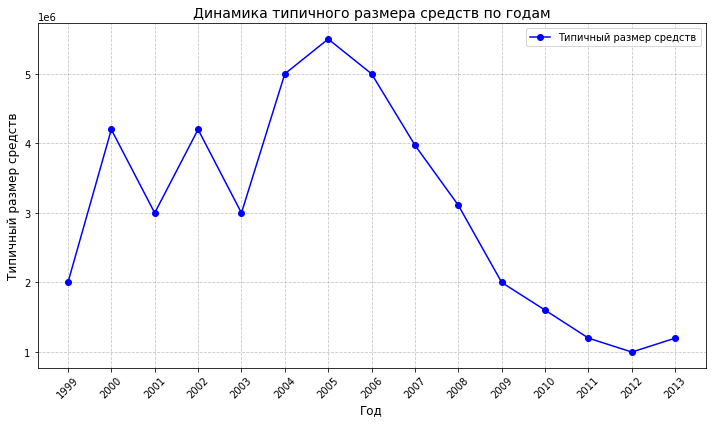

In [42]:
# Удалим строки с годом 1900 и 1990, а также с нулевым финансированием
filtered_table = filtered_table[
    (filtered_table['year'] != 1900) & 
    (filtered_table['year'] != 1990) & 
    (filtered_table['typical_raised_amount'] > 0)
]

# Данные для графика
years = filtered_table['year']
typical_raised_amount = filtered_table['typical_raised_amount']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, typical_raised_amount, marker='o', linestyle='-', color='b', label='Типичный размер средств')

# Настройка графика
plt.title('Динамика типичного размера средств по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Типичный размер средств', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years, rotation=45)
plt.legend(fontsize=10)

# Отображение графика
plt.tight_layout()
plt.show()

In [44]:
# Находим индекс строки с максимальным значением типичного размера средств
max_raised_year = filtered_table.loc[filtered_table['typical_raised_amount'].idxmax()]
print(f"Год с максимальным размером собранных средств: {max_raised_year['year']}")

Год с максимальным размером собранных средств: 2005.0


In [45]:
# Фильтруем таблицу по 2013 году
year_2013_data = filtered_table[filtered_table['year'] == 2013]

# Извлекаем информацию о количестве раундов и типичном размере средств в 2013 году
total_rounds_2013 = year_2013_data['total_rounds'].values[0]
typical_raised_2013 = year_2013_data['typical_raised_amount'].values[0]

# Выводим информацию
print(f"В 2013 году было {total_rounds_2013} раундов, а типичный размер собранных средств составлял {typical_raised_2013}.")

В 2013 году было 11072 раундов, а типичный размер собранных средств составлял 1200000.0.


**В результате полученных данных и визуализации мы видим:**

1. В 2005 году был собран максимальный размер средств, в этом году стартапы получили наибольшую сумму в рамках одного раунда.

2. Тенденция по количеству раундов и выделяемых в рамках каждого раунда средств в 2013 году:

- В 2013 году было проведено 11,072 раунда финансирования, что является самым высоким значением за весь период. Это говорит о том, что стартапы стали активно привлекать инвестиции, количество раундов сильно увеличилось.
- Типичный размер средств в 2013 году составил 1,200,000. Это значение ниже, чем в 2005 году (5,500,000), что может свидетельствовать о том, что в последние годы было больше мелких раундов с меньшими суммами, чем в более ранние годы, когда размеры раундов были значительно выше.

**Вывод:**
- Максимальный размер средств был собран в 2005 году (5,500,000 на один раунд).
- В 2013 году наблюдается увеличение количества раундов до 11,072, но снижение размера средств, выделяемых на один раунд (1,200,000). Это может означать, что стартапы стали привлекать более мелкие суммы, но гораздо более активно, чем в предыдущие годы.


### 2.4. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [46]:
# Выведем уникальные значения
print("Уникальные значения в столбце 'id' для таблицы people:")
print(people['id'].nunique())
print("\nУникальные значения в столбце 'person_id' для таблицы education:")
print(education['person_id'].nunique())

Уникальные значения в столбце 'id' для таблицы people:
226708

Уникальные значения в столбце 'person_id' для таблицы education:
68451


In [47]:
# Выведем пересечение значений
people_education = set(people['id']).intersection(set(education['person_id']))

# Выведем размер пересечений
print("\nПересечение между people и education:")
print(len(people_education))


Пересечение между people и education:
68071


In [48]:
# Объединим таблицы people и education, оставив все данные о сотрудниках и присоединив образование
merged_people_education = people.merge(education, left_on='id', right_on='person_id', how='left')

# Заменяем названия столбцов
merged_people_education.rename(columns={'id_x': 'id_people', 'id_y': 'id_education'}, inplace=True)

display(merged_people_education)
merged_people_education.dtypes

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,2_415.00,10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2_526.00,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188_200.00,network,25_958.00,174_088.00,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143_419.00,itechsocialnet,18_871.00,118_386.00,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


id_people                    int64
first_name                  object
last_name                   object
company_id                 float64
network_username            object
id_education               float64
person_id                  float64
instituition                object
graduated_at        datetime64[ns]
dtype: object

In [49]:
# Извлекаем числовые значения из столбца 'object_id' таблицы degrees и приводим их к числовому типу
degrees['object_id'] = degrees['object_id'].astype(str).str.extract('(\d+)')
degrees['object_id'] = degrees['object_id'].astype(float).fillna(-100).astype(int)
display(degrees)

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


In [50]:
# Выведем уникальные значения
print("Уникальные значения в столбце 'id_people' для таблицы merged_people_education:")
print(merged_people_education['id_people'].nunique())
print("\nУникальные значения в столбце 'object_id' для таблицы degrees:")
print(degrees['object_id'].nunique())

Уникальные значения в столбце 'id_people' для таблицы merged_people_education:
226708

Уникальные значения в столбце 'object_id' для таблицы degrees:
68451


In [51]:
# Выведем пересечение значений
merged_people_education_degrees = set(merged_people_education['id_people']).intersection(set(degrees['object_id']))

# Выведем размер пересечений
print("\nПересечение между merged_people_education и degrees:")
print(len(merged_people_education_degrees))


Пересечение между merged_people_education и degrees:
68071


**Анализ данных и вывод:**
1. Уникальные значения:
- В таблице `merged_people_education` уникальных значений `id_people` — 226708 из 226709 строк.
- В таблице `degrees` уникальных значений `object_id` — 68451 из 109610 строк.

2. Пересечение значений: пересечение между `id_people` и `object_id` составляет 68071, что означает, что значительное количество значений из `object_id` таблицы `degrees` есть в `id_people`, но не все.

3. Вывод: да, таблицы можно объединить по столбцам `id_people` и `object_id`, для анализа полноты информации об образовании лучше использовать LEFT JOIN, чтобы сохранить всех сотрудников и отметить тех, для кого нет данных об образовании.

In [52]:
merged_people_education_degrees = merged_people_education.merge(degrees, left_on='id_people', right_on='object_id', how='left')

# Заменим название столбца
merged_people_education_degrees.rename(columns={'id': 'id_degrees'}, inplace=True)
display(merged_people_education_degrees)

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,id_degrees,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.00,NaN,2_415.00,10.00,Harvard University,NaT,2_415.00,10.00,NaN,Computer Science
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2_526.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370831,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
370832,174088,Dr. Ray,Woods,188_200.00,network,25_958.00,174_088.00,Sydney University Medical School,1982-01-01,25_958.00,174_088.00,M.B.B.S.,Medicine
370833,118386,Ricardo,Durand,143_419.00,itechsocialnet,18_871.00,118_386.00,ESCS,2004-01-01,18_871.00,118_386.00,PhD,Journalism
370834,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [53]:
# Проверим наличие информации об образовании
merged_people_education_degrees['has_education'] = merged_people_education_degrees['id_education'].notna()| merged_people_education_degrees['id_degrees'].notna()
print("Наличие информации об образовании:")
print(merged_people_education_degrees['has_education'].value_counts())

Наличие информации об образовании:
True     212198
False    158638
Name: has_education, dtype: int64


In [54]:
# Считаем количество сотрудников в каждой компании
company_employee_count = merged_people_education_degrees.groupby('company_id')['id_people'].nunique().reset_index()
company_employee_count.rename(columns={'id_people': 'employee_count'}, inplace=True)
print("Количество сотрудников в каждой компании:")
display(company_employee_count)

Количество сотрудников в каждой компании:


,company_id,employee_count
0,1.00,2
1,2.00,1
2,3.00,3
3,4.00,13
4,5.00,61
...,...,...
22917,285_897.00,2
22918,285_953.00,1
22919,285_972.00,2
22920,285_996.00,1


In [55]:
# Считаем количество сотрудников без образования
no_education_count = merged_people_education_degrees[~merged_people_education_degrees['has_education']].groupby('company_id')['id_people'].nunique().reset_index()
no_education_count.rename(columns={'id_people': 'no_education_count'}, inplace=True)

# Объединяем данные с общим количеством сотрудников в каждой компании
company_education = company_employee_count.merge(no_education_count, on='company_id', how='left')

# Заполняем пропуски в количестве сотрудников без образования (если таких сотрудников нет, ставим 0)
company_education['no_education_count'] = company_education['no_education_count'].fillna(0)

# Рассчитываем долю сотрудников без образования
company_education['no_education_ratio'] = company_education['no_education_count'] / company_education['employee_count']
print("Доля сотрудников без образования:")
display(company_education)

Доля сотрудников без образования:


,company_id,employee_count,no_education_count,no_education_ratio
0,1.00,2,1.00,0.50
1,2.00,1,0.00,0.00
2,3.00,3,1.00,0.33
3,4.00,13,1.00,0.08
4,5.00,61,16.00,0.26
...,...,...,...,...
22917,285_897.00,2,0.00,0.00
22918,285_953.00,1,1.00,1.00
22919,285_972.00,2,1.00,0.50
22920,285_996.00,1,0.00,0.00


In [56]:
# Создаем категории по числу сотрудников
bins = [0, 10, 50, 100, 500, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-500', '500+']
company_education['employee_group'] = pd.cut(company_education['employee_count'], bins=bins, labels=labels)

# Группируем данные по категориям числа сотрудников
result = company_education.groupby('employee_group')['no_education_ratio'].mean().reset_index()

# Переименовываем столбцы для удобства
result.rename(columns={'no_education_ratio': 'avg_no_education_ratio'}, inplace=True)

# Выводим результат
display(result)

,employee_group,avg_no_education_ratio
0,0-10,0.47
1,11-50,0.44
2,51-100,0.29
3,101-500,0.28
4,500+,NaN


In [57]:
# Создаем категории по числу сотрудников
bins = [0, 1, 5, 10, 50, 100, 500, float('inf')]
labels = ['1', '2-5', '6-10', '11-50', '51-100', '101-500', '500+']
company_education['employee_group'] = pd.cut(company_education['employee_count'], bins=bins, labels=labels)

# Группируем данные по категориям числа сотрудников
result = company_education.groupby('employee_group')['no_education_ratio'].mean().reset_index()

# Переименовываем столбцы для удобства
result.rename(columns={'no_education_ratio': 'avg_no_education_ratio'}, inplace=True)

# Выводим результат
display(result)

,employee_group,avg_no_education_ratio
0,1,0.46
1,2-5,0.48
2,6-10,0.53
3,11-50,0.44
4,51-100,0.29
5,101-500,0.28
6,500+,NaN


In [58]:
# Рассчитываем среднюю долю сотрудников без образования по группам
education_analysis = company_education.groupby('employee_group')['no_education_ratio'].mean().reset_index().round(2)
education_analysis.rename(columns={'no_education_ratio': 'avg_no_education_ratio'}, inplace=True)

# Выводим результат
with pd.option_context('display.max_colwidth', 120, 'display.float_format', '{:,.0f}'.format):
    display(education_analysis)

,employee_group,avg_no_education_ratio
0,1,0
1,2-5,0
2,6-10,1
3,11-50,0
4,51-100,0
5,101-500,0
6,500+,NaN


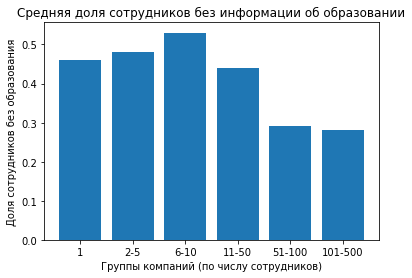

In [59]:
# Визуализация
plt.bar(education_analysis['employee_group'], education_analysis['avg_no_education_ratio'])
plt.title('Средняя доля сотрудников без информации об образовании')
plt.xlabel('Группы компаний (по числу сотрудников)')
plt.ylabel('Доля сотрудников без образования')
plt.show()

**Вывод на основе результатов:**

1. Небольшие компании (6-10 сотрудников):
- Средняя доля сотрудников без образования — 53%. Это самая высокая доля, что может свидетельствовать о меньшем уровне доступности информации или меньшем внимании к сбору данных в небольших организациях.

2. Компании с одним сотрудником или количеством 2-5 человек:
- Доля, также, достаточно высока, 46% и 48%

3. Компании среднего размера (11-50 сотрудников) - доля снижается до 44%, что указывает на более полные данные об образовании по мере увеличения размера компании.

4. Крупные компании (101-500 сотрудников) - средняя доля сотрудников без образования составляет 28%, что подтверждает предыдущую теорию, что по мере увеличения компании доля сотрудников без образования снижается.

5. Очень крупные компании (500+ сотрудников) - средняя доля сотрудников без образования не указана, что может указывать на отсутствие данных для этой категории.

**Итоговый вывод:**

На основании анализа можно сделать вывод, что полнота сведений об образовании сотрудников, как правило, увеличивается с размером компании. В компаниях с меньшим количеством сотрудников (0-10) наблюдается самая высокая доля сотрудников без данных об образовании, в средних и крупных компаниях этот показатель снижается. Это может быть связано с тем, что большие компании чаще уделяют внимание сбору и поддержанию более полных данных о своих сотрудниках.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [60]:
# Сделаем фильтрацию на основе заданных условий
filtered_data = company_and_rounds[
    ((company_and_rounds['funding_rounds'] > 0) | (company_and_rounds['investment_rounds'] > 0)) | 
    (company_and_rounds['status'] == 'acquired')
]
display(filtered_data)

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,company_id_combined,year
0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,888.00,2005-10-01,series-a,5_250_000.00,0.00,2.00,0.00,1.00,1.00,2_005.00
1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,889.00,2007-01-01,series-b,9_500_000.00,0.00,3.00,0.00,0.00,1.00,2_007.00
2,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,2_312.00,2008-05-19,series-c+,25_000_000.00,0.00,4.00,1.00,0.00,1.00,2_008.00
3,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN
4,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217466,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,...,20_896.00,2011-01-10,venture,7_000_000.00,0.00,1.00,1.00,0.00,3_429.00,2_011.00
217467,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,...,2_836.00,2008-01-31,angel,1_300_000.00,0.00,8.00,1.00,1.00,7_748.00,2_008.00
217469,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,3.00,...,12_687.00,2010-03-05,angel,500_000.00,0.00,2.00,0.00,1.00,43_233.00,2_010.00
217470,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,3.00,...,21_259.00,2011-02-02,series-a,7_000_000.00,0.00,5.00,0.00,0.00,43_233.00,2_011.00


In [61]:
# Объединим данные с таблицей acquisition, чтобы дополнить данные информацией о сделках
merged_data = filtered_data.merge(
    acquisition,
    left_on='company_id_combined', 
    right_on='acquired_company_id',  # Компании, которые были приобретены
    how='left'
)
display(merged_data)

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,is_first_round,is_last_round,company_id_combined,year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,0.00,1.00,1.00,2_005.00,NaN,NaN,NaN,NaN,NaN,NaT
1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,0.00,0.00,1.00,2_007.00,NaN,NaN,NaN,NaN,NaN,NaT
2,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,...,1.00,0.00,1.00,2_008.00,NaN,NaN,NaN,NaN,NaN,NaT
3,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,...,NaN,NaN,10.00,NaN,1.00,11.00,10.00,NaN,20_000_000.00,2007-05-30
4,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,...,NaN,NaN,100.00,NaN,20.00,377.00,100.00,cash,0.00,2005-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61850,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,...,1.00,0.00,3_429.00,2_011.00,NaN,NaN,NaN,NaN,NaN,NaT
61851,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,...,1.00,1.00,7_748.00,2_008.00,NaN,NaN,NaN,NaN,NaN,NaT
61852,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,3.00,...,0.00,1.00,43_233.00,2_010.00,6_968.00,5.00,43_233.00,cash_and_stock,1_010_470_000.00,2012-04-09
61853,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,3.00,...,0.00,0.00,43_233.00,2_011.00,6_968.00,5.00,43_233.00,cash_and_stock,1_010_470_000.00,2012-04-09


In [62]:
# Проверяем количество уникальных компаний в результирующей таблице
unique_companies_count = merged_data['company_id_combined'].nunique()
print(f"Количество уникальных компаний в результирующей таблице: {unique_companies_count}")

Количество уникальных компаний в результирующей таблице: 40747



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* Аномальные значения установите графически, а типичные при помощи таблиц и формул.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [63]:
# Посмотрим основные статистические показатели
display(merged_data['funding_total'].describe())

# Проверим уникальные значения
display(merged_data['funding_total'].value_counts().head(10))  # Часто встречающиеся значения
display(merged_data['funding_total'].sort_values().head(10))   # Минимальные значения
display(merged_data['funding_total'].sort_values(ascending=False).head(10))  # Максимальные значения

count          61_855.00
mean       21_134_481.57
std        90_028_934.06
min                 0.00
25%            59_700.00
50%         2_477_000.00
75%        15_950_000.00
max     5_700_000_000.00
Name: funding_total, dtype: float64

0.00             13352
1_000_000.00       766
500_000.00         560
2_000_000.00       525
100_000.00         523
10_000_000.00      476
5_000_000.00       463
3_000_000.00       419
1_500_000.00       411
50_000.00          383
Name: funding_total, dtype: int64

30927   0.00
26439   0.00
26438   0.00
26432   0.00
26431   0.00
26430   0.00
26428   0.00
26424   0.00
26440   0.00
58234   0.00
Name: funding_total, dtype: float64

2293    5_700_000_000.00
2294    5_700_000_000.00
2295    5_700_000_000.00
2296    5_700_000_000.00
46526   3_985_050_000.00
46527   3_985_050_000.00
24964   2_600_000_000.00
61813   2_425_700_000.00
61812   2_425_700_000.00
61814   2_425_700_000.00
Name: funding_total, dtype: float64

**Ключевые выводы:**
1. Общие выводы:
- Средний общий размер финансирования составляет около 21.13 млн долларов, однако стандартное отклонение очень велико, что указывает на сильную вариативность данных.
- Медиана - 2.477 млн долларов, значительно меньше среднего, что говорит о наличии больших выбросов.
- Минимум - 0 долларов, что нам говорит о том, что есть компании без финансирования.
- Максимум - 5.7 млрд долларов, ааномально высокое значение, подтверждает наличие выбросов.

2. Часто встречающиеся значения:
- самое частое значение 0 долларов (13,352 записи).

In [64]:
# Вычисляем IQR и границы выбросов
Q1 = merged_data['funding_total'].quantile(0.25)
Q3 = merged_data['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

# Отфильтруем выбросы
outliers = merged_data[(merged_data['funding_total'] < lower_bound) | (merged_data['funding_total'] > upper_bound)]
typical = merged_data[(merged_data['funding_total'] >= lower_bound) & (merged_data['funding_total'] <= upper_bound)]

print(f"Количество выбросов: {outliers.shape[0]}")
print(f"Количество типичных значений: {typical.shape[0]}")

Нижняя граница выбросов: -23775750.0
Верхняя граница выбросов: 39785450.0
Количество выбросов: 7922
Количество типичных значений: 53933


**Мы выяснили следующую информацию:**

1. Границы выбросов:
- Нижняя граница: -23,775,750 долларов. Это указывает на то, что нижняя граница выбросов неадекватна для таких данных.
- Верхняя граница: 39,785,450 долларов, что выглядит вполне разумным.

2. Типичные значения:
- Количество типичных значений: 53,933. Это компании с финансированием между 0 и ~39.8 млн долларов. Значительное большинство данных (~87%) находится в типичном диапазоне.

3. Выбивающиеся значения:
- Количество выбросов: 7,922, это около 13% от общего числа компаний.
- Компании с отрицательным финансированием отсутствуют, что логично.

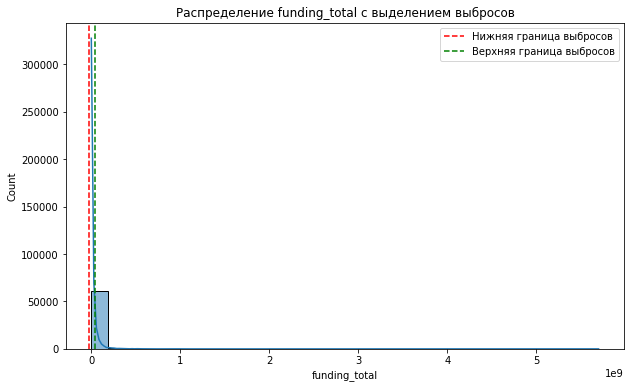

In [65]:
# Визуализируем данные
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['funding_total'], bins=30, kde=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Нижняя граница выбросов')
plt.axvline(upper_bound, color='g', linestyle='--', label='Верхняя граница выбросов')
plt.title('Распределение funding_total с выделением выбросов')
plt.legend()
plt.show()

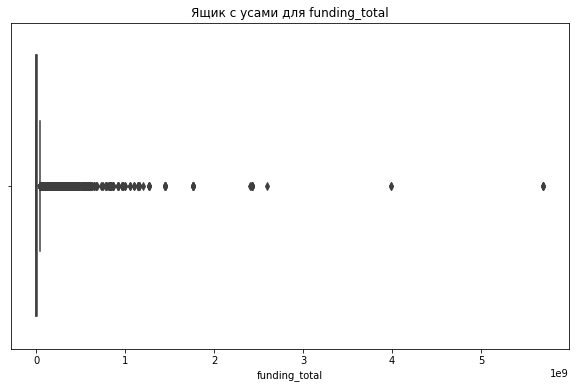

In [66]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['funding_total'])
plt.title('Ящик с усами для funding_total')
plt.show()

**На основе полученных графиков можно сделать следующие выводы:**

1. Гистограмма с выделением выбросов:

Распределение данных:
- Данные по столбцу funding_total сильно смещены влево.
- Большинство компаний имеют низкие значения общего финансирования (ближе к 0), что характерно для малого и среднего бизнеса.
Выбросы:
- Значения, значительно превышающие верхнюю границу выбросов (~39.8 млн долларов), представлены как отдельные пики в правой части графика. Эти выбросы соответствуют крупным инвестициям и, вероятно, относятся к стартапам, которые привлекли значительное финансирование.

2. Boxplot (Ящик с усами):

Выбросы:
- Верхние выбросы явно выделяются на графике и представляют компании с финансированием значительно выше типичного диапазона.
- Верхние значения финансирования (~3-5 млрд долларов) подтверждают наличие сильных выбросов.
- Типичные значения: большинство данных расположено в пределах ящика, что соответствует типичному диапазону финансирования (между 25-м и 75-м процентилями).

3. Границы выбросов:
- Нижняя граница (отрицательное значение) не отображается, так как значения финансирования не могут быть отрицательными. Фактически нижняя граница равна 0, что разумно.
- Верхняя граница (~39.8 млн долларов) хорошо видна, и все значения выше этой границы считаются выбросами.

4. Общие выводы:
- Большинство компаний имеют низкое финансирование: это подтверждается концентрацией значений около 0 на гистограмме.
- Выбросы составляют значительную часть данных: около 13% компаний (7,922 записи) имеют финансирование выше верхней границы выбросов (~39.8 млн долларов).

**Итоговый вывод:**

Типичное финансирование для компаний варьируется от 0 до ~39.8 млн долларов, в то время как компании с финансированием выше этой границы относятся к выбросам, что подтверждено графиками и статистическими исследованиями.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

Кроме этого, заказчик скоро получит доступ к базе данных SQLite, которая содержит данные по ценам покупки стартапов и размерам предварительного финансирования.

Известно, что данные в базе похожи на имеющиеся, однако в ней отсутствуют как оконные функции, так и встроенные функции для расчёта квартилей и процентилей. Эту работу придётся делать вручную. Для облегчения расчётов заказчик хочет определить, каким процентилям соответствуют выбросы.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [67]:
# Фильтруем компании с ценой продажи 0 или 1 доллар и ненулевым финансированием
zero_or_one_dollar_sales = merged_data[
    (merged_data['price_amount'].isin([0, 1])) & 
    (merged_data['funding_total'] > 0)
]
display(zero_or_one_dollar_sales)

,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,is_first_round,is_last_round,company_id_combined,year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
38,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,...,0.00,0.00,10_054.00,2_008.00,9_288.00,23_283.00,10_054.00,cash_and_stock,0.00,2013-08-13
39,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,...,0.00,1.00,10_054.00,2_005.00,9_288.00,23_283.00,10_054.00,cash_and_stock,0.00,2013-08-13
40,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,...,0.00,0.00,10_054.00,2_005.00,9_288.00,23_283.00,10_054.00,cash_and_stock,0.00,2013-08-13
41,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,...,0.00,0.00,10_054.00,2_006.00,9_288.00,23_283.00,10_054.00,cash_and_stock,0.00,2013-08-13
42,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,...,0.00,0.00,10_054.00,2_011.00,9_288.00,23_283.00,10_054.00,cash_and_stock,0.00,2013-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61765,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,...,0.00,1.00,9_905.00,2_005.00,3_381.00,41_119.00,9_905.00,NaN,0.00,2010-06-24
61766,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,...,1.00,0.00,9_905.00,2_010.00,3_381.00,41_119.00,9_905.00,NaN,0.00,2010-06-24
61770,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.00,1.00,...,1.00,1.00,992.00,2_007.00,9_916.00,19_182.00,992.00,NaN,0.00,2010-07-02
61790,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.00,1.00,...,1.00,1.00,997.00,2_006.00,9_121.00,415.00,997.00,NaN,0.00,2013-07-15


In [68]:
# Расчитаем квартили
Q1 = merged_data['funding_total'].quantile(0.25)
Q3 = merged_data['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)  # Нижняя граница не может быть меньше нуля
upper_bound = Q3 + 1.5 * IQR         

print(f"Q1 (25-й процентиль): {Q1}")
print(f"Q3 (75-й процентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Q1 (25-й процентиль): 59700.0
Q3 (75-й процентиль): 15950000.0
IQR: 15890300.0
Нижняя граница выбросов: 0
Верхняя граница выбросов: 39785450.0


In [69]:
# Рассчитаем процентиль для нижней и верхней границ
lower_percentile = (merged_data['funding_total'] < lower_bound).mean() * 100
upper_percentile = (merged_data['funding_total'] <= upper_bound).mean() * 100

print(f"Процентиль нижней границы: {lower_percentile}%")
print(f"Процентиль верхней границы: {upper_percentile}%")

Процентиль нижней границы: 0.0%
Процентиль верхней границы: 87.1926279201358%


**На основе полученных данных можно сделать следующие выводы:**

1. Квартильные значения и межквартильный размах (IQR):
- Q1 (25-й процентиль): 59,700 долларов, это значение, ниже которого находится 25% компаний
- Q3 (75-й процентиль): 15,950,000 долларов, это значение, выше которого находится 25% компаний.
- IQR (межквартильный размах): 15,890,300 долларов. Разница между Q3 и Q1 показывает диапазон "типичных" значений.

2. Границы выбросов:
- Нижняя граница выбросов - 0 долларов. Значение скорректировано до 0, так как финансирование не может быть отрицательным.
- Верхняя граница выбросов - 39,785,450 долларов. Компании с финансированием выше этой суммы считаются выбросами.

3. Процентильные значения границ:
- Нижняя граница соответствует 0-му процентилю, все значения финансирования выше 0 уже попадают в анализ, поэтому нижняя граница выбросов корректна.
- Верхняя граница соответствует 87.2%-му процентилю, значит, около 12.8% компаний имеют финансирование выше этой границы и считаются выбросами.

4. Выводы о границах выбросов и их корректности:
- Нижняя граница (0): корректна, так как минимальное значение финансирования не может быть отрицательным.
- Верхняя граница (~87-й процентиль): граница выбросов захватывает верхние 12.8% компаний, что разумно. Эти компании явно отличаются от остальных по объёму финансирования.

**Итоговые выводы:**

Типичный диапазон финансирования для компаний - от 59,700 до 15,950,000 долларов. 
Выбросы начинаются с финансирования выше 39,785,450 долларов.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [70]:
# Группируем данные по категориям и расчитывае метрики
category_stats = merged_data.groupby('category_code').agg({
    'price_amount': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

# Переименуем столбцы для удобства
category_stats.columns = ['category_code', 'mean_price', 'std_price', 'min_price', 'max_price', 'startup_count']

# Выводим результат
display(category_stats.sort_values(by='mean_price', ascending=False).head(10))
display(category_stats.sort_values(by='std_price', ascending=False).head(10)) 

,category_code,mean_price,std_price,min_price,max_price,startup_count
9,enterprise,4_321_448_000.00,104_163_452_703.60,0.00,2_600_000_000_000.00,623
2,automotive,1_273_833_333.33,2_147_833_365.67,0.00,5_200_000_000.00,6
32,real_estate,887_600_000.00,2_129_788_210.65,0.00,6_850_000_000.00,10
24,nanotech,584_000_000.00,NaN,584_000_000.00,584_000_000.00,1
19,manufacturing,551_738_721.71,947_980_006.15,0.00,4_050_000_000.00,31
31,public_relations,549_326_700.00,3_802_535_900.24,0.00,39_000_000_000.00,250
3,biotech,370_841_772.36,1_336_462_342.85,0.00,20_000_000_000.00,615
11,finance,294_108_333.33,700_186_990.28,0.00,4_400_000_000.00,66
39,transportation,273_076_923.08,475_559_050.23,0.00,1_100_000_000.00,13
15,health,257_965_909.09,987_582_038.97,0.00,5_400_000_000.00,44


,category_code,mean_price,std_price,min_price,max_price,startup_count
9,enterprise,4_321_448_000.00,104_163_452_703.60,0.00,2_600_000_000_000.00,623
31,public_relations,549_326_700.00,3_802_535_900.24,0.00,39_000_000_000.00,250
2,automotive,1_273_833_333.33,2_147_833_365.67,0.00,5_200_000_000.00,6
32,real_estate,887_600_000.00,2_129_788_210.65,0.00,6_850_000_000.00,10
3,biotech,370_841_772.36,1_336_462_342.85,0.00,20_000_000_000.00,615
28,other,135_280_530.21,1_058_850_372.21,0.00,18_400_000_000.00,331
15,health,257_965_909.09,987_582_038.97,0.00,5_400_000_000.00,44
19,manufacturing,551_738_721.71,947_980_006.15,0.00,4_050_000_000.00,31
37,software,126_691_904.66,729_174_792.66,0.00,10_200_000_000.00,1838
11,finance,294_108_333.33,700_186_990.28,0.00,4_400_000_000.00,66


**На основании полученных данных можно сделать следующие выводы:**

1. Категории с наибольшими средними ценами:
- Enterprise (4.3 млрд долларов): наиболее дорогая категория, с большим количеством стартапов (623). Эта категория привлекает крупных инвесторов.
- Automotive (1.27 млрд долларов): несмотря на высокую среднюю цену, низкое количество стартапов (6) указывает на эксклюзивность и высокую стоимость единичных сделок.
- Real Estate (887.6 млн долларов): высокая стоимость в сфере недвижимости ожидаема из-за специфики рынка.

2. Категории с наибольшим разбросом цен:
- Public Relations (3.8 млрд долларов): категория с самым высоким разбросом цен, что говорит о высоких рисках и значительных различиях в оценке стартапов.
- Real Estate (2.1 млрд долларов): вторая категория с высоким разбросом, что ожидаемо для сферы недвижимости, где стоимость активов может существенно варьироваться.
- Automotive (2.14 млрд долларов): высокий разброс при небольшом количестве стартапов подтверждает уникальность и стоимость сделок.

3. Категории, сочетающие высокие средние цены и разброс:
- Enterprise: Высокая средняя цена и умеренный разброс делают эту категорию предсказуемо привлекательной.
- Real Estate: Высокая цена и значительный разброс указывают на инвестиционные возможности для крупных игроков.
- Automotive: Небольшое количество сделок с высокими ценами и рисками.

In [71]:
# Фильтруем категории с достаточным количеством стартапов
significant_categories = category_stats[category_stats['startup_count'] >= 5]

# Топ категорий по средней цене
top_mean_price = significant_categories.sort_values(by='mean_price', ascending=False).head(5)

# Топ категорий по разбросу цен
top_std_price = significant_categories.sort_values(by='std_price', ascending=False).head(5)

# Объединяем два списка для полного анализа
top_categories = pd.concat([top_mean_price, top_std_price]).drop_duplicates()
display(top_categories)

,category_code,mean_price,std_price,min_price,max_price,startup_count
9,enterprise,4_321_448_000.00,104_163_452_703.60,0.00,2_600_000_000_000.00,623
2,automotive,1_273_833_333.33,2_147_833_365.67,0.00,5_200_000_000.00,6
32,real_estate,887_600_000.00,2_129_788_210.65,0.00,6_850_000_000.00,10
19,manufacturing,551_738_721.71,947_980_006.15,0.00,4_050_000_000.00,31
31,public_relations,549_326_700.00,3_802_535_900.24,0.00,39_000_000_000.00,250
3,biotech,370_841_772.36,1_336_462_342.85,0.00,20_000_000_000.00,615


Пять категорий позволяют сосредоточиться на наиболее значимых сегментах, где высокие средние цены указывают на крупные сделки, высокий разброс цен отражает высокий риск и потенциал для инвесторов.
Этот размер выборки достаточен, чтобы выявить ключевые тренды.

- Средняя цена показывает привлекательность категории для крупных сделок
- Разброс цен (стандартное отклонение) помогает понять риск, связанный с категорией.

**Рекомендации:**

1. Фокус на категории Enterprise: наиболее предсказуемая категория с высокой средней ценой.
2. Детальный анализ Public Relations и Real Estate: эти категории интересны из-за большого разброса цен, что предполагает высокий риск, но и потенциал для крупных доходов.
3. Рекомендуется сочетать анализ средней цены с оценкой разброса для сбалансированной стратегии инвестирования.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [73]:
# Основная статистика по funding_rounds
print(merged_data['funding_rounds'].describe())

# Уникальные статусы стартапов
print(merged_data['status'].unique())

count   61_855.00
mean         2.16
std          1.98
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         15.00
Name: funding_rounds, dtype: float64
['operating', 'acquired', 'closed', 'ipo']
Categories (4, object): ['operating', 'acquired', 'closed', 'ipo']


**Общая статистика по `funding_rounds`:**

1. Среднее количество раундов: 2.16.
2. Медиана равна 2.00 - половина стартапов проходила не более 2 раундов финансирования.
3. Максимальное значение - 15 раундов.

In [74]:
# Группируем данные
funding_rounds_by_status = merged_data.groupby('status')['funding_rounds'].agg(['mean', 'std', 'count']).reset_index()

# Переименуем столбцы для удобства
funding_rounds_by_status.columns = ['status', 'average_rounds', 'std_rounds', 'startup_count']

# Сортируем по среднему количеству раундов
funding_rounds_by_status = funding_rounds_by_status.sort_values(by='average_rounds', ascending=False)
display(funding_rounds_by_status)

,status,average_rounds,std_rounds,startup_count
2,ipo,3.99,3.30,1388
3,operating,2.38,1.90,45666
1,closed,1.88,1.34,2893
0,acquired,1.16,1.79,11908


**Типичные значения для каждого статуса:**

1. IPO (среднее: 3.99):
- Стартапы, которые вышли на IPO, проходят наибольшее количество раундов финансирования.
- Высокое стандартное отклонение (3.30) указывает на то, что некоторые стартапы достигают IPO с небольшим числом раундов, в то время как другие проходят много этапов.
2. Operating (среднее: 2.38):
- Действующие стартапы имеют второе по величине среднее количество раундов.
3. Closed (среднее: 1.88):
- Компании, которые закрылись, в среднем проходили меньшее количество раундов.
4. Acquired (среднее: 1.16):
- Приобретённые стартапы имеют самое низкое среднее количество раундов. Вероятно, они привлекли меньше капитала перед покупкой.

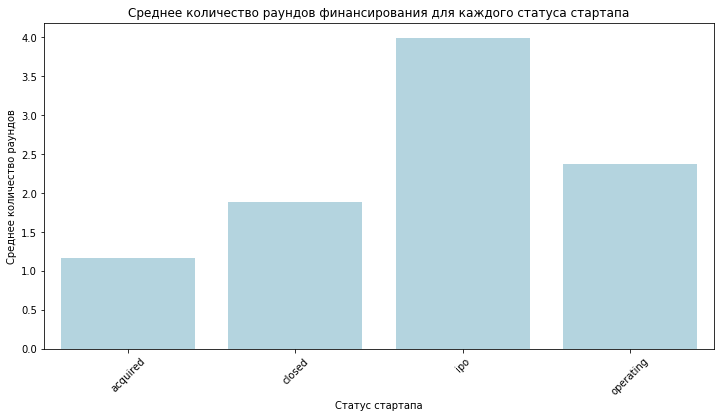

In [75]:
# Построим график
plt.figure(figsize=(12, 6))
sns.barplot(data=funding_rounds_by_status, x='status', y='average_rounds', color='lightblue')
plt.title('Среднее количество раундов финансирования для каждого статуса стартапа')
plt.ylabel('Среднее количество раундов')
plt.xlabel('Статус стартапа')
plt.xticks(rotation=45)
plt.show()

**Итоговый вывод:**

1. Стартапы с разными статусами проходят разное количество раундов финансирования.
2. Типичное количество раундов для каждого статуса:
- IPO ~4 раунда
- Operating ~2.4 раунда
- Closed ~1.9 раунда
- Acquired ~1.2 раунда

3. Стартапы с высоким количеством раундов (IPO и Operating) более привлекательны для долгосрочных инвестиций, так как они уже доказали свою жизнеспособность.
4. Компании с небольшим числом раундов (Acquired) могут быть более привлекательными для раннего вхождения или использования их технологий.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

**В данном проект были выполнены следующие шаги:**

1. Загрузка и предобработка данных: данные загружены, проведена проверка на наличие пропусков, дибликатов и некорректных значений
2. Исследовательский анализ данных:
- Общий анализ финансирования - определены типичные значения и выбросы
- Категории стартапов: выявлены категории с наибольшей средней ценой продажи, определены категории с наиболее высоким разбросом цен.
- Анализ раундов финансирования: пассчитано среднее количество раундов для разных статусов стартапов.
- Визуализация данных: построены графики распределения финансирования, выбросов, а также средних значений по категориям и статусам стартапов.
- Стартапы, проданные за символическую сумму (0 или 1 доллар), были выделены и проанализированы.

**Итоговые выводы:**

1. Анализ финансирования (funding_total).
- Типичный диапазон финансирования: от 59,700 до 15,950,000 долларов.
- Выбросы: значения выше 39,785,450 долларов (87.2%-й процентиль).

2. Категории стартапов.
- Наибольшая средняя цена: Enterprise (4.3 млрд долларов), Automotive (1.27 млрд долларов), Real Estate (887.6 млн долларов)
- Наибольший разброс цен: Public Relations (3.8 млрд долларов), Real Estate (2.1 млрд долларов), Automotive (2.14 млрд долларов).

3. Анализ раундов финансирования (funding_rounds).
- Среднее количество раундов для статусов: IPO - 4 раунда, Operating - 2.4 раунда, Closed - 1.9 раунда, Acquired - 1.2 раунда.
- Стартапы с большим количеством раундов (IPO и Operating) демонстрируют устойчивую траекторию роста.

4. Анализ стартапов, проданных за символическую сумму (0 или 1 доллар): эти стартапы имеют ненулевое финансирование, но проходят малое число раундов.

5. Визуализация данных: построенные графики подтвердили статистические выводы, сделав их наглядными